##  IMPORTING NEEDED LIBRARIES

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
%matplotlib inline

## LOADING DATASET

In [53]:
df = pd.read_csv('./HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## CHECKING FOR NULL VALUES

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## CLEANING THE DATASET

In [18]:
df.fillna(df[['CRIM','ZN','INDUS','CHAS', 'AGE', 'LSTAT']].mean(), inplace=True)

## SELECTING COLUMNS TO BE USED IN TRAINING AND TESTINGTHE MODEL 

In [20]:
features= ['CRIM', 'INDUS', 'CHAS', 'NOX', 'AGE', 'RAD', 'TAX', 'B', 'PTRATIO', 'LSTAT']
X = df[features]
y = df['MEDV']

## VISUALIZING HOW HOUSES PRICES ARE AFFECTED BY POPULATION OF POOR PEOPLE

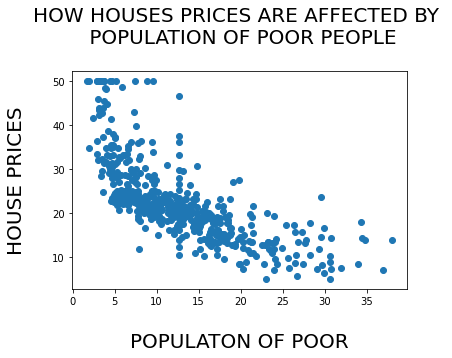

In [34]:
plt.title('HOW HOUSES PRICES ARE AFFECTED BY \n POPULATION OF POOR PEOPLE\n', fontsize=20)
plt.xlabel('\nPOPULATON OF POOR', fontsize= 20)
plt.ylabel('HOUSE PRICES\n', fontsize= 20)
plt.scatter(df['LSTAT'], y, )

## FITTING AND VALIDATING THE RANDOM FOREST REGRESSOR MODEL

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=1)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f'The mean absolute error score is {mae}')

The mean absolute error score is 2.9946372549019595


## VISUALIZING HOW THE PREDICTED VALUES CORRELATES WITH THE ACTUAL TEST VALUES

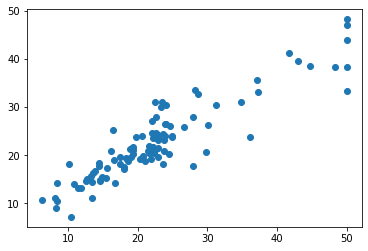

In [38]:
plt.scatter(y_test, predictions)